In [52]:
import pandas as pd

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

In [53]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [54]:
failures = failures.set_index('datetime')
failures.head()

,machineID,failure
datetime,,
2015-01-05 06:00:00,1,comp4
2015-03-06 06:00:00,1,comp1
2015-04-20 06:00:00,1,comp2
2015-06-19 06:00:00,1,comp4
2015-09-02 06:00:00,1,comp4


In [55]:
failures['datetime'] = pd.to_datetime(failures.index.values)

In [56]:
failures.index = pd.to_datetime(failures.index.values)

In [57]:
failures.head()

,machineID,failure,datetime
2015-01-05 06:00:00,1,comp4,2015-01-05 06:00:00
2015-03-06 06:00:00,1,comp1,2015-03-06 06:00:00
2015-04-20 06:00:00,1,comp2,2015-04-20 06:00:00
2015-06-19 06:00:00,1,comp4,2015-06-19 06:00:00
2015-09-02 06:00:00,1,comp4,2015-09-02 06:00:00


In [51]:
failures['weekday'] = failures['datetime'].dt.weekday.replace(dict(zip(range(7),'Mon Tue Wed Thu Fri Sat Sun'.split())))
failures.head()

,machineID,failure,datetime,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday
2015-01-05 06:00:00,1,comp4,2015-01-05 06:00:00,1,0,0,0,0,0,0,Mon
2015-03-06 06:00:00,1,comp1,2015-03-06 06:00:00,0,0,0,0,1,0,0,Fri
2015-04-20 06:00:00,1,comp2,2015-04-20 06:00:00,1,0,0,0,0,0,0,Mon
2015-06-19 06:00:00,1,comp4,2015-06-19 06:00:00,0,0,0,0,1,0,0,Fri
2015-09-02 06:00:00,1,comp4,2015-09-02 06:00:00,0,0,1,0,0,0,0,Wed


In [31]:
failures = pd.get_dummies(failures,columns=['weekday'])
failures.head()


,machineID,failure,datetime,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
2015-01-05 06:00:00,1,comp4,2015-01-05 06:00:00,1,0,0,0,0,0,0
2015-03-06 06:00:00,1,comp1,2015-03-06 06:00:00,0,0,0,0,1,0,0
2015-04-20 06:00:00,1,comp2,2015-04-20 06:00:00,1,0,0,0,0,0,0
2015-06-19 06:00:00,1,comp4,2015-06-19 06:00:00,0,0,0,0,1,0,0
2015-09-02 06:00:00,1,comp4,2015-09-02 06:00:00,0,0,1,0,0,0,0


In [70]:
X = failures[[c for c in failures.columns if c.startswith('wek')]] 
y = failures['failure']
print(X)

Empty DataFrame
Columns: []
Index: [2015-01-05 06:00:00, 2015-03-06 06:00:00, 2015-04-20 06:00:00, 2015-06-19 06:00:00, 2015-09-02 06:00:00, 2015-10-17 06:00:00, 2015-12-16 06:00:00, 2015-03-19 06:00:00, 2015-03-19 06:00:00, 2015-04-18 06:00:00, 2015-12-29 06:00:00, 2015-01-07 06:00:00, 2015-02-06 06:00:00, 2015-07-21 06:00:00, 2015-10-04 06:00:00, 2015-12-03 06:00:00, 2015-01-17 06:00:00, 2015-02-16 06:00:00, 2015-04-02 06:00:00, 2015-07-16 06:00:00, 2015-08-30 06:00:00, 2015-10-14 06:00:00, 2015-01-09 06:00:00, 2015-02-23 06:00:00, 2015-04-09 06:00:00, 2015-06-23 06:00:00, 2015-09-06 06:00:00, 2015-10-06 06:00:00, 2015-11-20 06:00:00, 2015-01-24 06:00:00, 2015-01-24 06:00:00, 2015-02-08 06:00:00, 2015-04-24 06:00:00, 2015-05-09 06:00:00, 2015-05-24 06:00:00, 2015-07-08 06:00:00, 2015-09-21 06:00:00, 2015-10-21 06:00:00, 2015-12-20 06:00:00, 2015-03-07 06:00:00, 2015-03-22 06:00:00, 2015-04-21 06:00:00, 2015-08-04 06:00:00, 2015-10-18 06:00:00, 2015-03-04 06:00:00, 2015-06-17 06:00:00

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

model.fit(X= X, y = y)
model.score(X,y)

ValueError: at least one array or dtype is required

In [59]:
sum(model.predict(X) == failures['failure'])/len(failures)

0.3324572930354796

In [60]:
model.predict_proba(X)

array([[0.22257728, 0.24332948, 0.25933087, 0.27476237],
       [0.2954588 , 0.17640511, 0.28503665, 0.24309943],
       [0.22257728, 0.24332948, 0.25933087, 0.27476237],
       ...,
       [0.30525284, 0.27251119, 0.21176357, 0.2104724 ],
       [0.30525284, 0.27251119, 0.21176357, 0.2104724 ],
       [0.19134231, 0.30325393, 0.24126003, 0.26414373]])

In [61]:
model.coef_

array([[-0.1160256 ,  0.0540837 , -0.25656124,  0.20985472,  0.18380475,
        -0.05763244, -0.01505773],
       [-0.02947395,  0.06681619,  0.20135488,  0.0938036 , -0.3345319 ,
        -0.21420309,  0.22094238],
       [ 0.04705751,  0.04156632, -0.01449716, -0.14556253,  0.15814589,
         0.1240507 , -0.2170674 ],
       [ 0.09844204, -0.16246621,  0.06970351, -0.15809579, -0.00741874,
         0.14778483,  0.01118275]])

In [48]:
pd.to_datetime('12/15/2021').weekday()

2

In [2]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


Text(0.5, 0, 'Date')

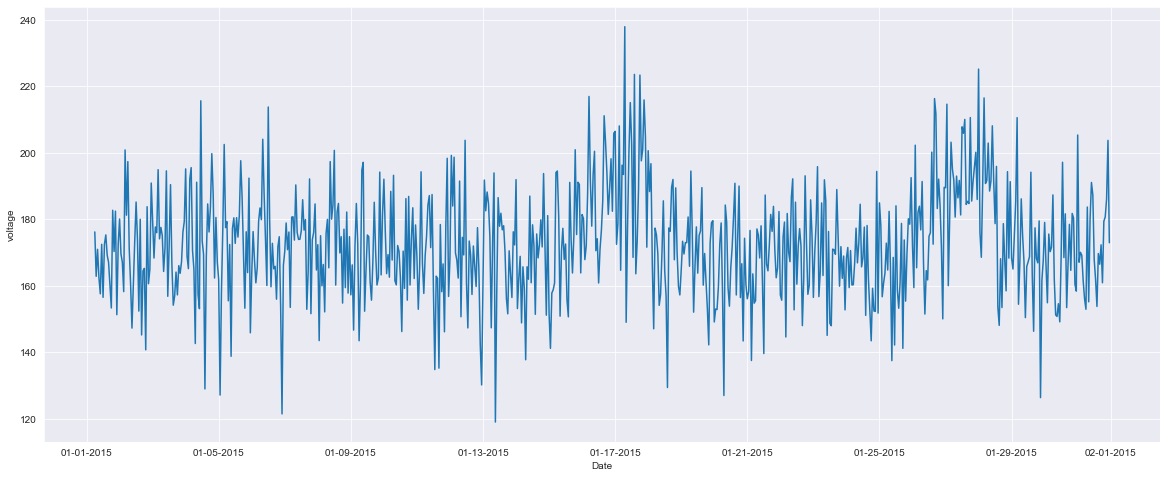

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

In [4]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

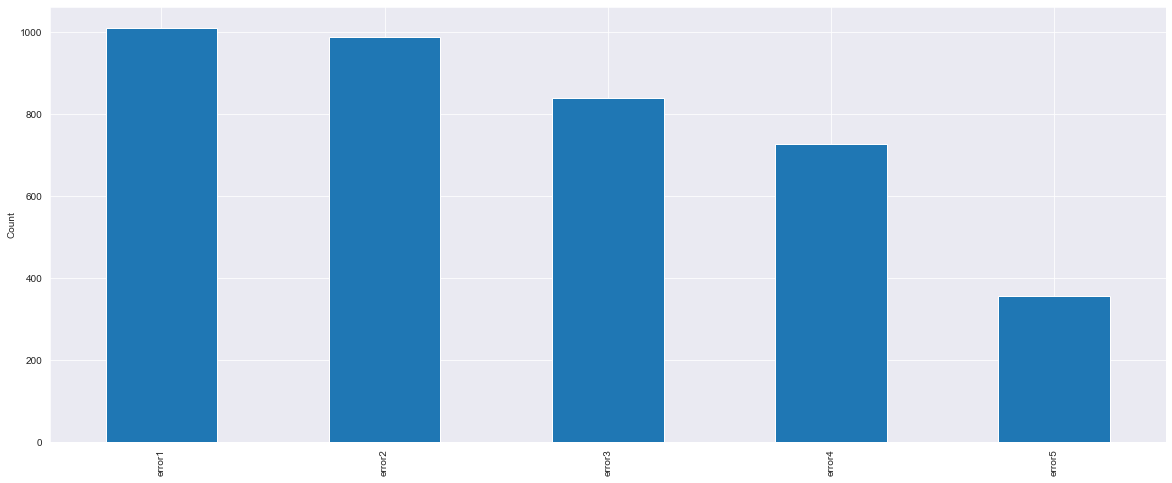

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()

In [6]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


comp2    863
comp4    811
comp3    808
comp1    804
Name: comp, dtype: int64

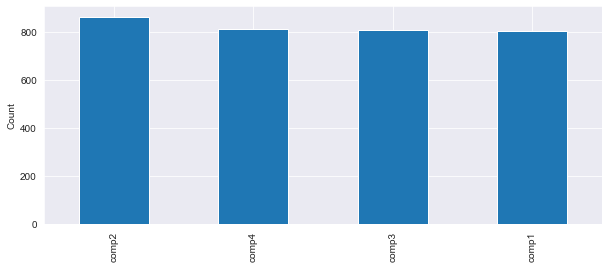

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
maint['comp'].value_counts().plot(kind='bar')
plt.ylabel('Count')
maint['comp'].value_counts()

comp2    863
comp4    811
comp3    808
comp1    804
Name: comp, dtype: int64

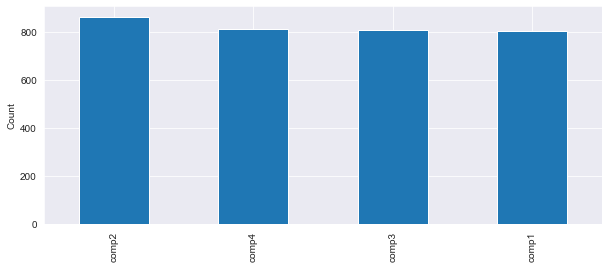

In [7]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [6]:
telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object